In [1]:
import numpy as np

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

from easy21.Easy21Env import * 
from easy21.SarsaLambdaAgent import *

No. of episodes: 20000


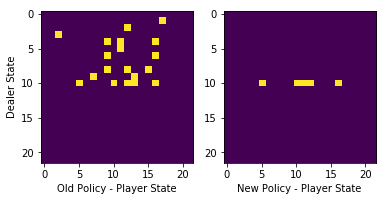

No. of episodes: 40000


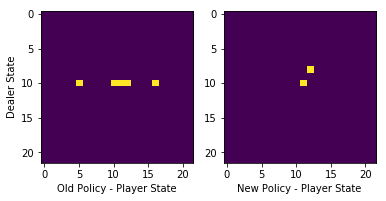

No. of episodes: 80000


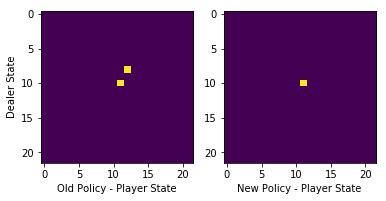

No. of episodes: 160000


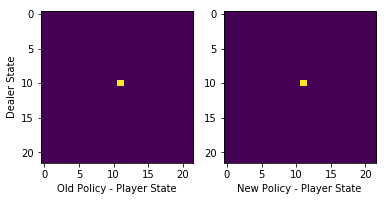

In [2]:
%matplotlib inline

env = Easy21Env()
agent = SarsaLambdaAgent(env, gamma=1, lmbda=0.5, N0=200000)

K = 10000
Q = agent.learn(K)
A_ = np.argmax(Q, axis=2)
A = np.ones_like(A_)
while (not np.array_equal(A_, A)):
    A = A_
    K *= 2
    print('No. of episodes: {:}'.format(K))
    Q = agent.learn(K)
    A_ = np.argmax(Q, axis=2)

    plt.subplot(1,2,1)
    plt.imshow(A.T, cmap='viridis')
    plt.xlabel('Old Policy - Player State')
    plt.ylabel('Dealer State')
    plt.subplot(1,2,2)
    plt.imshow(A_.T, cmap='viridis')
    plt.xlabel('New Policy - Player State')
    plt.show()


<IPython.core.display.Javascript object>


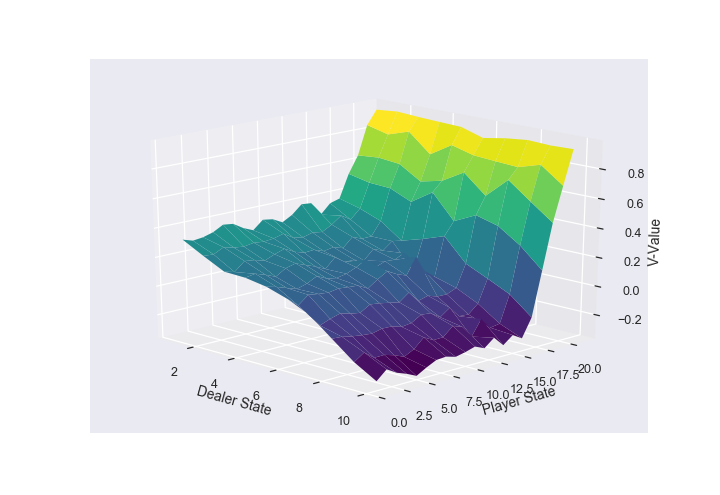

In [8]:
%matplotlib notebook

V = agent.value().T

fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.arange(1, 11)
y = np.arange(1, 22)
X, Y = np.meshgrid(x, y)
Z = V[X, Y]

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
ax.view_init(20, -45)
ax.set_xlabel('Dealer State')
ax.set_ylabel('Player State')
ax.set_zlabel('V-Value')

plt.show()

<IPython.core.display.Javascript object>


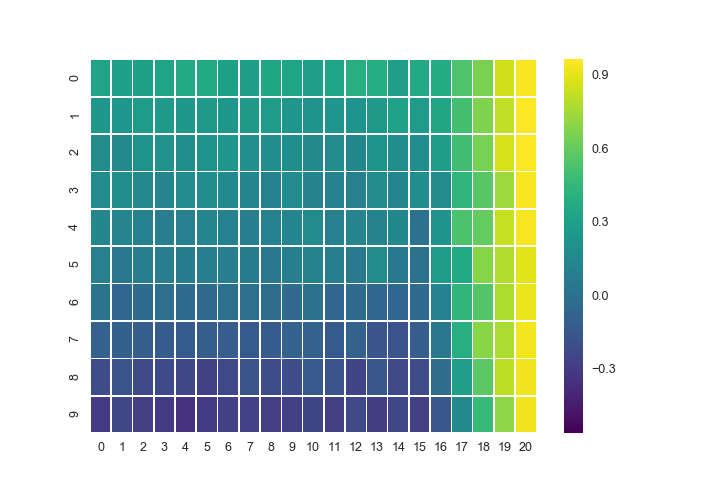

In [7]:
import seaborn as sns

sns.heatmap(Z.T, linewidths=.5, cmap='viridis', center=0.2)